## Importing used libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from preprocessing import preprocess_data, preprocess_data_relevant, balancing_data
from implementations import *
from utils import accuracy_score, f1_score, cross_validation_ridge_reg, best_cv_ridge_reg, cross_validation_log_reg, best_cv_log_reg #build_k_indices

## Loading the data

First, we are going to load the data that we'll feed to our alorithm in order for it to learn. We have 3 .csv files to import: <br> *x_train.csv*, *x_test.csv* and *y_train.csv*.

In [2]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("/Users/sarazatezalo/Documents/EPFL/semester 1/ML_course/projects/project1/data/dataset_to_release 2")




### Dealing with unbalanced classes

Optimal values of class weights are- for class 0: 0.5484272630030753 , for class 1: 5.662381363244176
(357110,)
(357110,)
Percentage of data of -1s in the dataset:  16.2274929293495 %


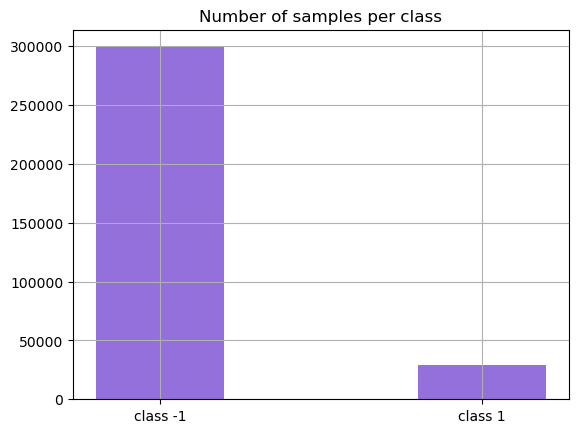

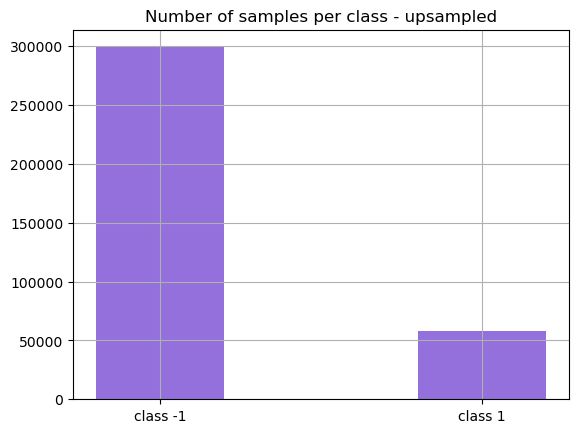

In [64]:
N_class1 = np.sum((y_train==1).astype(int))
N_class0 = np.sum((y_train==-1).astype(int))
N = len(y_train)
w0 = N/2/N_class0
w1 = N/2/N_class1
print('Optimal values of class weights are- for class 0:', w0, ', for class 1:', w1)

fig = plt.figure()
names = ['class -1', 'class 1']
numbers = [N_class0, N_class1]
plt.bar(names, numbers, color='mediumpurple', width=0.4)
plt.title('Number of samples per class')
plt.grid(visible=True)
plt.savefig('unbalanced.png')

x_train_pp, y_train_pp = balancing_data(x_train, y_train, neg_label=-1)
N_class1 = np.sum((y_train_pp==1).astype(int))
N_class0 = np.sum((y_train_pp==-1).astype(int))
fig = plt.figure()
names = ['class -1', 'class 1']
numbers = [N_class0, N_class1]
plt.bar(names, numbers, color='mediumpurple', width=0.4)
plt.title('Number of samples per class - upsampled')
plt.grid(visible=True)
plt.savefig('balanced.png')

print('Percentage of data of -1s in the dataset: ', 100*N_class1/(N_class1+N_class0), '%')


### 1) When preprocessed with the whole set of features

In [18]:
# Using suggested values of weights

gammas = np.logspace(-5, -1, 3)
lambdas = np.logspace(-4, -1, 3)
w0s = [0.54]
w1s = [5.66]


x_train_pp, x_test_pp, y_train_pp = preprocess_data(x_train, y_train, x_test, neg_label=0)
print(x_train_pp.shape)
initial_w = np.zeros((x_train_pp.shape[1],))
k_fold = 5
max_iters = 25

best_lambda, best_gamma, best_acc, best_weights, best_f1, best_w0, best_w1 = best_cv_log_reg(y_train_pp, x_train_pp, k_fold, lambdas, gammas, max_iters, w0s, w1s, False)

print(f'Optimal values found are: best lambda: {best_lambda}, best gamma: {best_gamma}, best weight for class 0: {best_w0}, for class 1: {best_w1}')

print(f'Best accuracy on {k_fold}-fold: ', best_acc)
print(f'Best F1 score on {k_fold}-fold for class 1 ', best_f1)

(328135, 195)
(328135, 196)


/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-1-girl-mse/utils.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


Optimal values found are: best lambda: 0.0001, best gamma: 0.001, best weight for class 0: 0.54, for class 1: 5.66
Best accuracy on 5-fold:  0.8056409709418378
Best F1 score on 5-fold for class 1  0.36071963009141206


In [19]:
# Predictions using logistic regression when using class weights and unbalanced data

gammas = np.logspace(-5, -1, 3)
lambdas = np.logspace(-4, -1, 3)
w0s = [0.54, 0.85, 0.9, 1, 0.54]
w1s = [3.5, 1.5, 1, 1, 5.66]


x_train_pp, x_test_pp, y_train_pp = preprocess_data(x_train, y_train, x_test, neg_label=0)
print(x_train_pp.shape)
initial_w = np.zeros((x_train_pp.shape[1],))
k_fold = 5
max_iters = 25

best_lambda, best_gamma, best_acc, best_weights, best_f1, best_w0, best_w1 = best_cv_log_reg(y_train_pp, x_train_pp, k_fold, lambdas, gammas, max_iters, w0s, w1s, False)

print(f'Optimal values found are: best lambda: {best_lambda}, best gamma: {best_gamma}, best weight for class 0: {best_w0}, for class 1: {best_w1}')

print(f'Best accuracy on {k_fold}-fold: ', best_acc)
print(f'Best F1 score on {k_fold}-fold for class 1 ', best_f1)


(328135, 195)
(328135, 196)
Optimal values found are: best lambda: 0.1, best gamma: 0.1, best weight for class 0: 1, for class 1: 1
Best accuracy on 5-fold:  0.894189891355692
Best F1 score on 5-fold for class 1  0.38155608365464405


In [21]:
# For balancing with class weights- search for the best values for optimal gamma and lambda
lambdas = [0.1]
gammas = [0.1]
w0s = [0.55, 0.75, 0.85, 0.9, 0.95, 1]
w1s = [1, 1.25, 1.5]

x_train_pp, x_test_pp, y_train_pp = preprocess_data(x_train, y_train, x_test, neg_label=0)
print(x_train_pp.shape)
initial_w = np.zeros((x_train_pp.shape[1],))
k_fold = 5
max_iters = 25

for w0 in w0s:
    for w1 in w1s:
       _, _, best_acc, _, best_f1, _, _ = best_cv_log_reg(y_train_pp, x_train_pp, k_fold, lambdas, gammas, max_iters, [w0], [w1], balancing=True)
       print(f'For the w0:{w0}, and w1:{w1} we get F1 score of: {best_f1}, and accuracy of: {best_acc}')


(328135, 195)
(328135, 196)
For the w0:0.55, and w1:1 we get F1 score of: 0.3944444049188787, and accuracy of: 0.8852454020448899
For the w0:0.55, and w1:1.25 we get F1 score of: 0.34620706464712625, and accuracy of: 0.904066923674707
For the w0:0.55, and w1:1.5 we get F1 score of: 0.27629512810947665, and accuracy of: 0.9120544897679309
For the w0:0.75, and w1:1 we get F1 score of: 0.4060455413066208, and accuracy of: 0.8661435080073749
For the w0:0.75, and w1:1.25 we get F1 score of: 0.38817487060297934, and accuracy of: 0.8915842564798027
For the w0:0.75, and w1:1.5 we get F1 score of: 0.3444230192198471, and accuracy of: 0.9053407896140309
For the w0:0.85, and w1:1 we get F1 score of: 0.4066952226431117, and accuracy of: 0.8565834184101057
For the w0:0.85, and w1:1.25 we get F1 score of: 0.3993189172511257, and accuracy of: 0.8851021683148705
For the w0:0.85, and w1:1.5 we get F1 score of: 0.36544082552881846, and accuracy of: 0.9008639736693738
For the w0:0.9, and w1:1 we get F1 s

In [25]:
# For balancing by adding the minority class again (upsampling), with optimal weight parameters

lambdas = [0.1]
gammas = [0.1]
w0s = [1]
w1s = [1]

x_train_pp, x_test_pp, y_train_pp = preprocess_data(x_train, y_train, x_test, neg_label=0)
initial_w = np.zeros((x_train_pp.shape[1],))
k_fold = 5
max_iters = 25

for w0 in w0s:
    for w1 in w1s:
       best_lambda, best_gamma, best_acc, best_weights, best_f1, best_w0, best_w1 = best_cv_log_reg(y_train_pp, x_train_pp, k_fold, lambdas, gammas, max_iters, [w0], [w1], balancing=True)
       print(f'For the w0: {w0}, and w1: {w1} we get F1 score of: {best_f1}, and accuracy of: {best_acc}')
       print(f'Best lambda:{best_lambda}, best gamma:{best_gamma}')

(328135, 195)
For the w0: 1, and w1: 1 we get F1 score of: 0.40484176604969935, and accuracy of: 0.843028022003139
Best lambda:0.1, best gamma:0.1


In [26]:
# Prediction using best parameters and ridge logistic regression

y_prediction = np.array([-1 if sigmoid(x.T @ best_weights) < 0.5 else 1 for x in x_test_pp])
print(y_prediction.shape)

(109379,)


In [27]:
print('There are this much -1s: ', np.sum((y_prediction==-1).astype(int)))
print('There are this much 1s: ', np.sum((y_prediction==1).astype(int)))


There are this much -1s:  90280
There are this much 1s:  19099


In [28]:
create_csv_submission(test_ids, y_prediction, "prediction.csv")

In [3]:
# For best parameters, different preprocessing - added the expansion with pairs for random 10 features

gammas = np.logspace(-5, -1, 5)
lambdas = np.logspace(-4, -1, 5)
w0s = [0.85]
w1s = [1.5]

x_train_pp, x_test_pp, y_train_pp = preprocess_data(x_train, y_train, x_test, neg_label=0)
print(x_train_pp.shape)
initial_w = np.zeros((x_train_pp.shape[1],))
k_fold = 5
max_iters = 50

best_lambda, best_gamma, best_acc, best_weights, best_f1, best_w0, best_w1 = best_cv_log_reg(y_train_pp, x_train_pp, k_fold, lambdas, gammas, max_iters, w0s, w1s)

print(f'Best accuracy on {k_fold}-fold: ', best_acc)
print(f'Best F1 score on {k_fold}-fold for class 1 ', best_f1)

(328135, 156)
Best accuracy on 5-fold:  0.8422996632483581
Best F1 score on 5-fold for class 1  0.3461833326817825


In [68]:
# Prediction using ridge linear regression

x_train_pp, x_test_pp, y_train_pp = preprocess_data(x_train, y_train, x_test, neg_label=-1)
lambdas = np.logspace(-4, 0, 10)
k_fold = 5
best_lambda, best_acc, best_weights, best_f1 = best_cv_ridge_reg(y_train_pp, x_train_pp, k_fold, lambdas)
y_train_prediction = np.array([-1 if x.T @ best_weights < 0 else 1 for x in x_train_pp])

print('Accuracy on KFold for the best model: ', best_acc)
print('F1 on KFold for the best model: ', best_f1)


(328135, 195)
Accuracy on KFold for the best model:  0.895875173328051
F1 on KFold for the best model:  0.3748010131450104


In [69]:
print('Best lambda is: ', best_lambda)

Best lambda is:  1.0


### 2) When preprocessed with a set of relevant features:

In [83]:
# Predictions using logistic regression

gammas = np.logspace(-5, -1, 3)
lambdas = np.logspace(-4, -1, 3)
w0s = [1]
w1s = [1]

x_train_pp, x_test_pp, y_train_pp = preprocess_data_relevant(x_train, y_train, x_test, neg_label=0)
print(x_train_pp.shape)
initial_w = np.zeros((x_train_pp.shape[1],))
k_fold = 5
max_iters = 25

best_lambda, best_gamma, best_acc, best_weights, best_f1, best_w0, best_w1 = best_cv_log_reg(y_train_pp, x_train_pp, k_fold, lambdas, gammas, max_iters, w0s, w1s, balancing=True)

print(f'Optimal values found are: best lambda: {best_lambda}, best gamma: {best_gamma}, best weight for class 0: {best_w0}, for class 1: {best_w1}')

print(f'Best accuracy on {k_fold}-fold: ', best_acc)
print(f'Best F1 score on {k_fold}-fold for class 1 ', best_f1)


(328135, 109)


/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-1-girl-mse/implementations.py:186: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


Optimal values found are: best lambda: 0.1, best gamma: 0.1, best weight for class 0: 1, for class 1: 1
Best accuracy on 5-fold:  0.8718972374175262
Best F1 score on 5-fold for class 1  0.3340997992598545


In [71]:
# Predictions using ridge linear regression
x_train_pp, x_test_pp, y_train_pp = preprocess_data_relevant(x_train, y_train, x_test, neg_label=-1)

lambdas = np.logspace(-4, 0, 10)
k_fold = 5
best_lambda, best_acc, best_weights, best_f1 = best_cv_ridge_reg(y_train_pp, x_train_pp, k_fold, lambdas)
y_train_prediction = np.array([-1 if x.T @ best_weights < 0 else 1 for x in x_train_pp])

print('Accuracy on KFold for the best model: ', best_acc)
print('F1 on KFold for the best model: ', best_f1)

Accuracy on KFold for the best model:  0.9128712267816601
F1 on KFold for the best model:  0.06964554079331883


In [72]:
print('Best lambda is: ', best_lambda)

Best lambda is:  0.0001
